# Unit 5 - Financial Planning


In [30]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [31]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [32]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [33]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [34]:
# Fetch current BTC price
btc_resp = requests.get(btc_url)
btc_json = btc_resp.json()
btc_price = btc_json['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_resp = requests.get(eth_url)
eth_json = eth_resp.json()
eth_price = eth_json['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $40260.00
The current value of your 5.3 ETH is $11159.20


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [35]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [36]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("AlpacaAPIAS")
alpaca_secret_key = os.getenv("Alpaca-skAS")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [43]:
# Format current date as ISO format
current_date = pd.Timestamp("2021-04-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = api.get_barset(
    tickers,
    timeframe,
    limit=1
).df

# Preview DataFrame
df_ticker.head(5)

AGG                                      SPY  \
                              open    high     low   close   volume    open   
time                                                                          
2021-07-09 00:00:00-04:00  115.735  115.76  115.69  115.69  4602694  432.53   

                                                              
                             high      low   close    volume  
time                                                          
2021-07-09 00:00:00-04:00  435.84  430.714  435.48  59254094

In [40]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker['AGG']['close'][0]
spy_close_price = df_ticker['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.69
Current SPY closing price: $435.48


In [41]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21774.00
The current value of your 200 AGG shares is $23138.00


### Savings Health Analysis

In [42]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_crypto = my_btc_value + my_eth_value
total_shares = my_spy_value + my_agg_value
data = [ total_crypto, total_shares]
df_savings = pd.DataFrame(data, index=['crypto','shares'], columns=['amount'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,51419.203
shares,44912.000


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

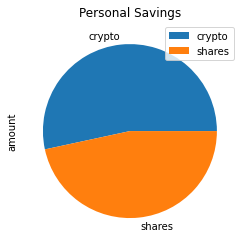

In [44]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title='Personal Savings')

In [73]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if (total_savings > emergency_fund):
    print("Congratulations - Enough money in this fund!")
elif (total_savings == emergency_fund):
    print("Congratualtions on reaching this financial goal!")
else:
    diff = emergency_fund - total_savings
    print(f"You are ${diff} You are away from reaching your financial goal")

Congratulations - Enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [47]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [48]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data_1 = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

next_start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
next_end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

df_stock_data_2 = api.get_barset(
    tickers,
    timeframe,
    start=next_start_date,
    end=next_end_date,
    limit=1000
).df

df_stock_data = pd.concat([df_stock_data_2, df_stock_data_1])


# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0  
2016-08-24 00:00:00-04:00  218.82  218.91  217.36  217.88  50310103.0

In [49]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [50]:
# Printing the simulation input data
MC_stocks_dist.portfolio_data.head()

AGG                                         \
                             open      high      low    close     volume   
time                                                                       
2016-08-17 00:00:00-04:00  112.45  112.6600  112.360  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.535  112.705  1814107.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.535  112.705  1814107.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.535  112.705  1814107.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.535  112.705  1814107.0   

                                           SPY                         \
                          daily_return    open   high     low   close   
time                                                                    
2016-08-17 00:00:00-04:00    -0.057474     NaN    NaN     NaN     NaN   
2016-08-18 00:00:00-04:00          NaN  218.33  218.9  218.21  218.87   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.9  218.21  218.87   
2016-08-18 00:00:00-04:00          NaN  218.33  218.9  218.21  218.87   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.9  218.21  218.87   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN     0.000000  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-18 00:00:00-04:00  42850145.0    -0.345778  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-18 00:00:00-04:00  42850145.0    -0.345778

In [51]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003663,0.991887,0.992053,1.002985,1.001050,0.983545,1.000382,0.993216,0.997392,0.994426,...,1.004970,0.979250,1.005820,1.014390,1.001675,0.991854,1.011565,1.002084,1.002009,1.007860
2,1.023621,0.989738,0.983410,0.996710,0.993978,0.987812,1.007951,0.994717,0.974868,0.979150,...,1.010383,0.981823,0.998883,1.015836,1.005369,0.997825,1.009368,1.000308,0.991307,1.012299
3,1.023860,0.992370,0.977937,0.980809,1.000198,1.000275,0.994239,0.982155,0.967416,0.979663,...,1.010211,0.997783,0.997903,1.032127,1.004714,1.005915,1.012200,0.991581,0.985292,1.005878
4,1.041072,1.007239,0.970664,0.975555,0.983080,0.999423,1.005059,1.000720,0.960931,0.978751,...,1.007663,1.000401,0.998222,1.023110,1.009588,1.015380,0.996438,0.985047,0.991315,1.010045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.632378,2.346452,8.401423,2.958585,5.059396,1.821152,4.130334,4.894805,3.767747,5.847351,...,8.490319,1.326784,9.090348,5.507696,4.060739,2.440716,4.114767,5.613878,1.819413,3.330566
7557,4.638141,2.371168,8.376257,2.979935,5.023821,1.815094,4.162689,4.918422,3.751609,5.775170,...,8.514517,1.336023,8.997893,5.542885,3.990546,2.443434,4.091056,5.682453,1.866106,3.369938
7558,4.638414,2.335622,8.328799,2.988602,5.084298,1.824760,4.261090,4.897425,3.698053,5.683257,...,8.479453,1.337832,9.080070,5.545648,4.051703,2.440050,4.079092,5.789386,1.867591,3.373299
7559,4.693954,2.318447,8.303055,3.003641,5.102699,1.813996,4.257875,4.925163,3.690236,5.707942,...,8.524421,1.350824,9.005395,5.515834,4.043949,2.439418,4.050707,5.814604,1.862339,3.387184


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

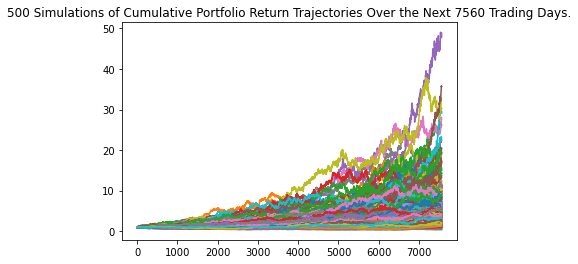

In [52]:
# Plot simulation outcomes
MC_stocks_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

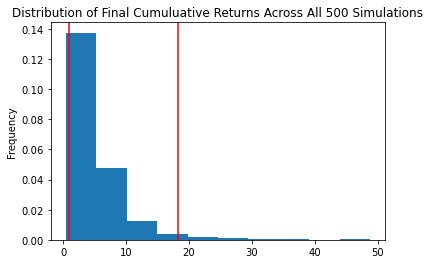

In [53]:
# Plot probability distribution and confidence intervals
MC_stocks_dist.plot_distribution()

### Retirement Analysis

In [55]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_stocks_dist.summarize_cumulative_return()

# Print summary statistics
summary

count           500.000000
mean              5.206551
std               4.854893
min               0.370269
25%               2.322269
50%               3.851364
75%               6.387500
max              48.818868
95% CI Lower      0.956637
95% CI Upper     18.196151
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [57]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*initial_investment, 2)
ci_upper = round(summary[9]*initial_investment, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19132.74 and $363923.01


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [58]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*initial_investment, 2)
ci_upper = round(summary[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $28699.11 and $545884.52


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [59]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2, 0.8],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [60]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999527,1.007643,1.000206,1.000321,1.012748,1.010373,0.992609,0.995272,0.995561,0.996369,...,1.004556,0.999458,1.003449,1.010789,0.993762,0.994708,0.988720,0.983973,1.002011,1.022157
2,1.000824,1.011767,0.994027,0.975677,0.988409,1.004467,1.011229,1.003925,0.999482,1.020212,...,1.000348,0.990899,1.009209,0.984810,1.033852,0.997851,0.978669,0.974728,1.011044,1.027300
3,1.011682,1.038062,0.984833,0.953329,0.976517,1.010629,1.008352,1.011558,1.004686,1.011941,...,1.012746,0.986024,1.014067,0.983101,1.024880,1.002235,0.977501,0.968101,0.993420,1.021943
4,1.010127,1.043869,0.982551,0.965369,0.977714,1.002509,1.007442,1.016063,1.019125,1.022228,...,1.026171,0.985911,1.029521,0.960856,1.022377,0.995510,0.995333,0.960232,0.967912,1.020840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.948021,1.441806,1.429773,1.869077,0.953639,2.289625,2.570226,2.097579,3.430269,1.242436,...,1.396292,0.977272,2.415339,1.116040,1.137844,0.907348,1.686584,1.013672,1.984181,0.890094
1257,1.920395,1.434303,1.435678,1.846685,0.966042,2.309093,2.584987,2.069213,3.424115,1.237793,...,1.418091,0.978845,2.470281,1.106300,1.150830,0.905098,1.699433,1.010937,1.952672,0.893454
1258,1.901196,1.432792,1.445720,1.860112,0.967432,2.303678,2.591478,2.087719,3.402696,1.243105,...,1.404193,0.954275,2.522509,1.092677,1.145722,0.897823,1.715027,1.039098,1.960148,0.900207
1259,1.907044,1.429297,1.448148,1.874491,0.972344,2.373403,2.553603,2.113154,3.419368,1.247404,...,1.380771,0.934772,2.516718,1.112910,1.148975,0.890312,1.727224,1.027578,1.913042,0.893804


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

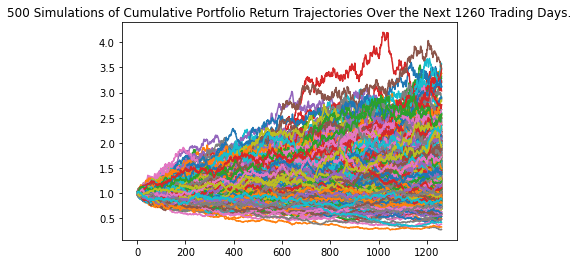

In [61]:
# Plot simulation outcomes
MC_stocks_5.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

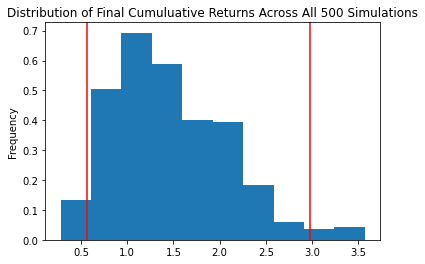

In [62]:
# Plot probability distribution and confidence intervals
MC_stocks_5.plot_distribution()

In [64]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_5 = MC_stocks_5.summarize_cumulative_return()

# Print summary statistics
summary_5

count           500.000000
mean              1.473360
std               0.620446
min               0.279680
25%               0.978774
50%               1.385837
75%               1.887125
max               3.569381
95% CI Lower      0.570385
95% CI Upper      2.976138
Name: 1260, dtype: float64

In [65]:
# Set initial investment
initial_investment = 25000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_5[8]*initial_investment, 2)
ci_upper_five = round(summary_5[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $25000 in the portfolio over the next 5 years will end within in the range of $14259.62 and $74403.45


### Ten Years Retirement Option

In [66]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.3, 0.7],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [67]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002461,1.009694,1.012276,0.991839,1.022422,1.002288,1.000879,0.982050,1.020237,1.003247,...,0.993545,0.990162,1.005273,0.989560,0.994815,0.998674,1.011139,1.001356,1.012155,0.988665
2,0.998498,1.030834,1.011276,0.981443,1.046223,1.001092,0.998541,0.972650,1.027441,0.998124,...,1.011697,1.000468,1.005066,0.966251,0.988974,1.009201,0.991983,1.019457,1.014522,0.991261
3,0.994233,1.032872,1.017873,0.984120,1.051446,1.015313,1.014348,0.969676,1.043207,1.000780,...,1.020711,1.019967,0.996284,0.959803,0.989236,0.990161,0.987778,1.030525,1.023330,1.002052
4,1.007174,1.018430,1.016948,0.984134,1.055289,1.025922,1.000729,0.978720,1.034105,1.007034,...,1.031433,1.029447,0.998785,0.963963,0.990126,0.985760,0.998881,1.020060,1.016385,1.005384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.330802,2.354342,2.150961,2.220620,1.549146,1.674212,2.676854,1.563851,2.261035,2.258238,...,0.926783,4.520125,3.848279,1.797934,1.645711,1.934918,1.951762,2.302715,1.538485,2.355308
2517,2.349317,2.320039,2.165487,2.221982,1.556010,1.672492,2.758682,1.580420,2.217304,2.261670,...,0.929168,4.482527,3.873818,1.827158,1.628709,1.947040,1.946242,2.335288,1.535238,2.386763
2518,2.332347,2.332822,2.170914,2.240765,1.542878,1.650616,2.752833,1.573452,2.213488,2.260192,...,0.935194,4.558771,3.909565,1.855827,1.584558,1.959275,1.956962,2.344196,1.579039,2.368891
2519,2.314873,2.352902,2.159510,2.221372,1.516224,1.642546,2.727459,1.561111,2.218050,2.254988,...,0.931655,4.574762,3.886598,1.879183,1.588255,1.960632,1.924966,2.336332,1.567888,2.404693


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

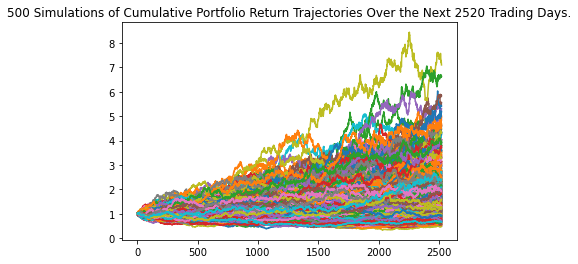

In [68]:
# Plot simulation outcomes
MC_stocks_10.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

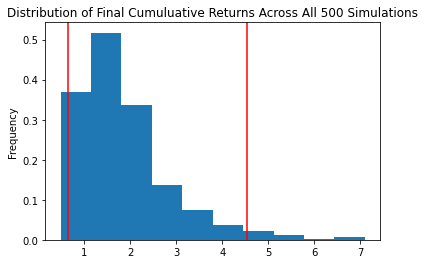

In [69]:
# Plot probability distribution and confidence intervals
MC_stocks_10.plot_distribution()

In [70]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_10 = MC_stocks_10.summarize_cumulative_return()

# Print summary statistics
summary_10

count           500.000000
mean              1.843415
std               0.997292
min               0.482810
25%               1.158990
50%               1.621561
75%               2.227092
max               7.096426
95% CI Lower      0.646777
95% CI Upper      4.542852
Name: 2520, dtype: float64

In [71]:
# Set initial investment
initial_investment = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary[8]*initial_investment, 2)
ci_upper_ten = round(summary[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $38265.49 and $727846.02
